In [1]:
# before this tutorial, please read Visualize_deep_features.ipynb first
# 
# we use pretrained vgg19 in this script
# so download model file 'vgg19.pth' by url:
# https://download.pytorch.org/models/vgg19-dcbb9e9d.pth
# 
# and place it in project directory

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
from Sequence import Sequence
from matplotlib.patches import Rectangle
from skimage import io,transform
import os
import torch
from torch.autograd import Variable
import vgg
import utils
from scipy import ndimage

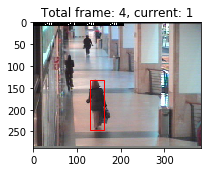

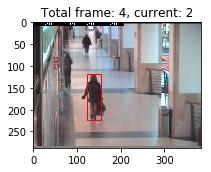

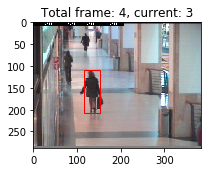

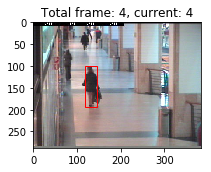

In [2]:
# Visualize Sequence 

sequence = Sequence(path = os.getcwd(), name='img_ScaleChange', 
                    region_format='rectangle')
plt.clf()

while sequence._frame < len(sequence._images):
    
    img = io.imread(sequence.frame())
    
    data = sequence.groundtruth[sequence._frame]
    gt_rect = Rectangle(
            xy=(data.x, data.y),
            width=data.width,
            height=data.height,
            facecolor='none',
            edgecolor='r',
    )
    plt.figure(figsize=(3,3))
    tracking_figure_axes = plt.subplot(111)
    tracking_figure_axes.add_patch(gt_rect)
    plt.imshow(img)
    plt.title('Total frame: %d, current: %d' % (len(sequence._images), 
                                                sequence._frame+1))
    
    sequence._frame += 1
    
sequence._frame = 0 # after that, we must reset the sequence